In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
df = pd.read_csv("ecommerce_sales.csv")

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.describe()




,OrderID,Date,Quantity,UnitPrice,TotalAmount
count,100.000000,100,100.000000,100.000000,100.000000
mean,1050.500000,2024-03-23 10:33:36,2.160000,31668.330000,68354.640000
min,1001.000000,2024-01-03 00:00:00,1.000000,732.000000,732.000000
25%,1025.750000,2024-02-07 06:00:00,1.000000,17971.250000,38143.000000
50%,1050.500000,2024-03-14 00:00:00,2.000000,31272.000000,57371.500000
75%,1075.250000,2024-05-12 00:00:00,3.000000,45115.500000,97089.000000
max,1100.000000,2024-06-25 00:00:00,3.000000,59837.000000,179217.000000
std,29.011492,NaN,0.813025,16107.565255,43066.408617


In [28]:
# Basic Exploration
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   OrderID      100 non-null    int64         
 1   Date         100 non-null    datetime64[ns]
 2   CustomerID   100 non-null    object        
 3   Product      100 non-null    object        
 4   Category     100 non-null    object        
 5   Quantity     100 non-null    int64         
 6   UnitPrice    100 non-null    int64         
 7   TotalAmount  100 non-null    int64         
 8   Region       100 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 7.2+ KB
None

First 5 rows:
   OrderID       Date CustomerID         Product  Category  Quantity  \
0     1001 2024-06-12       C015           Shirt  Clothing         3   
1     1002 2024-02-05       C003           Dress  Clothing         1   
2     1003 2024-01-08       C036       

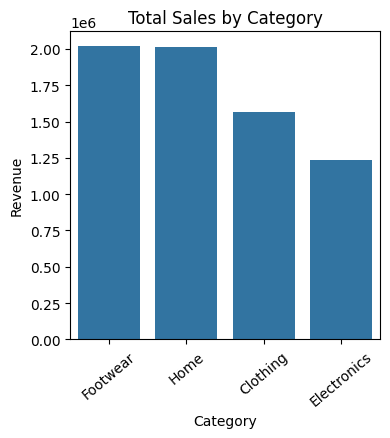

In [29]:
# Total Sales by Category
category_sales = df.groupby("Category")["TotalAmount"].sum().sort_values(ascending=False)
plt.figure(figsize=(4,4))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Sales by Category")
plt.ylabel("Revenue")
plt.xticks(rotation=40)
plt.show()

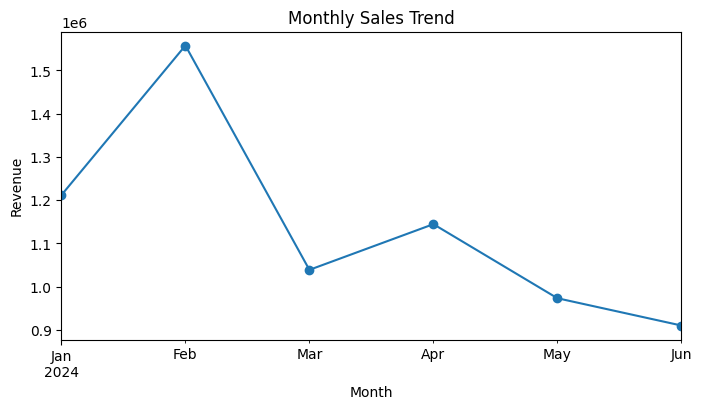

In [30]:
#  Monthly Sales Trend
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["TotalAmount"].sum()
plt.figure(figsize=(8,4))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.show()

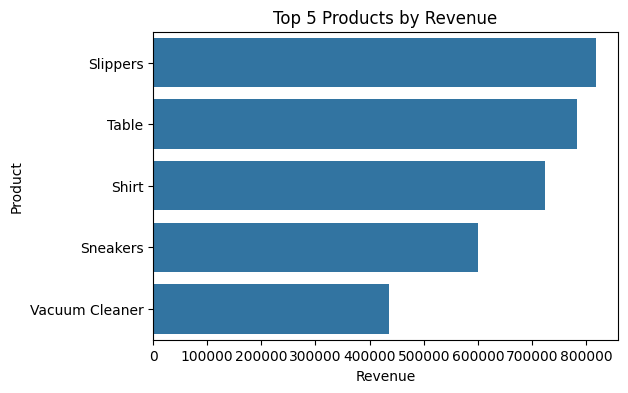

In [31]:
# Top 5 Products by Sales
product_sales = df.groupby("Product")["TotalAmount"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(6,4))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

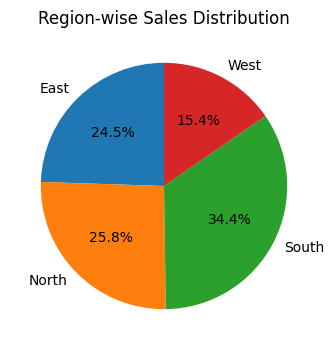

In [32]:
# Region-wise Sales
region_sales = df.groupby("Region")["TotalAmount"].sum()
plt.figure(figsize=(6,4))
region_sales.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Region-wise Sales Distribution")
plt.ylabel("")
plt.show()

In [33]:
# Key Metrics
avg_order_value = df["TotalAmount"].mean()
total_revenue = df["TotalAmount"].sum()
total_orders = df.shape[0]


print("\n--- Key Insights ---")
print(f"Total Revenue: {total_revenue:,.0f}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: {avg_order_value:,.2f}")


--- Key Insights ---
Total Revenue: 6,835,464
Total Orders: 100
Average Order Value: 68,354.64
